# Instacart Exploratory Data Analysis <a id='back'></a>

## Table of Contents

- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Step 1: Openings Data Files](#step-1-openings-data-files)
- [Step 2: Pre-processing the Data](#step-2-pre-processing-the-data)
    - [Exploring Missing Values](#exploring-missing-values)
- [Step 3: Data analysis](#step-3-data-analysis)
    - [Part: A](#part:-a)
        - [Part A-1: To verify 'order_hour_of_day' values are 0-23 and 'order_dow' are 0-6](#part-a-1-to-verify-order_hour_of_day-values-are-0-23-and-order_dow-are-0-6)
        - [Part A-2: Create a plot that shows how many people placed orders for each hour of the day](#part-a-2-create-a-plot-that-shows-how-many-people-placed-orders-for-each-hour-of-the-day)
        - [Part A-3: Create a plot that shows what day of the week people shop for groceries](#part-a-3-create-a-plot-that-shows-what-day-of-the-week-people-shop-for-groceries)
        - [Part A-4: Create a plot that shows how long people wait until placing their next order](#part-a-4-create-a-plot-that-shows-how-long-people-wait-until-placing-their-next-order)
    - [Part: B](#part:-b)
        - [Part B-1: Finding the difference in hourly order sales volume between Wednesdays and Saturdays](#part-b-1-finding-the-difference-in-hourly-order-sales-volume-between-wednesdays-and-saturdays)
        - [Part B-2: Customer order distribution plot](#part-b-2-customer-order-distribution-plot)
        - [Part B-3: Top 20 Products](#part-b-3-top-20-products)
    - [Part: C](#part:-c)
        - [Part C-1: Cart size per order](#part-c-1-cart-size-per-order)
        - [Part C-2: What are the top 20 items that are reordered most frequently?](#part-c-2-what-are-the-top-20-items-that-are-reordered-most-frequently)
- [Conclusion](#conclusion)

## Project Introduction

In this exploratory data analysis, we are going to be analyzing Instacart customers in 2017 on their order preferences to better understand their shopping behavior.

## Analysis Outline

##### Section A

•	Verify that values in the 'order_hour_of_day' columns in the orders table are in ranges from 0 to 23 and 'order_dow' ranges from 0 to 6.

•	Create a plot that shows how many people place orders for each hour of the day.

•	Create a plot that shows what day of the week people shop for groceries.

•	Create a plot that shows how long people wait until they place their next order.

##### Section B

•	Displayed the difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays using histograms.

•	Plotted the distribution for the number of total orders that customers make.

•	List the top 20 products that are most frequently ordered.

##### Section C

•	Calculated how large each customer's cart size is per order.

•	List of the top 20 items that are reordered most frequently by our customers.


## Results

Discovered our customers' shopping habits from purchase frequency to most popular sold products to highest store traffic periods.

[Back to Table of Contents](#back)

## Step 1: Openings Data Files

In [1]:
# Importing the needed libraries for this assignment
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Importing file for assignment
try:
    instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')
except:
    instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

try:
    products = pd.read_csv('products.csv', sep=';')
except:
    products = pd.read_csv('/datasets/products.csv', sep=';')

try:
    order_products = pd.read_csv('order_products.csv', sep=';')
except:
    order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

try:
    aisles = pd.read_csv('aisles.csv', sep=';')
except:
    aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

try:
    departments = pd.read_csv('departments.csv', sep=';')
except:
    departments = pd.read_csv('/datasets/departments.csv', sep=';')

[Back to Table of Contents](#back)

## Step 2: Pre-processing the Data

In [3]:
# Looking for duplicates, null values, and incorrect data types
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# Checking for duplicates
instacart_orders.duplicated().sum()

15

In [5]:
# Looking deeper into duplicated values
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [6]:
# Checking for duplicates in instacart_orders DataFrame on Wednesdays at 2AM 
instacart_orders[(instacart_orders['order_dow'] == 4) & (instacart_orders['order_hour_of_day'] == 2)].duplicated().sum()

0

In [7]:
# Removing all duplicate orders
instacart_orders.drop_duplicates(inplace=True)
instacart_orders.duplicated().sum()

0

In [8]:
# Checking for duplicates orders ids
instacart_orders['order_id'].duplicated().sum()

0

In [9]:
# Looking for duplicates, null values, and incorrect data types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
# Checking for duplicates
products.duplicated().sum()

0

In [11]:
# Checking for duplicates product ids
products['product_id'].duplicated().sum()

0

In [12]:
# Checking for duplicates
products['product_name'].duplicated().sum()

1257

In [13]:
# Lowering the string in case some letters were cased incorrectly
products['product_name'].str.lower()

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

In [14]:
# Rechecking for duplicates
products['product_name'].duplicated().sum()

1257

In [15]:
# After lowering the case of all entries in that column we have an increase in duplicates
products[products['product_name'].notna()]['product_name'].str.lower().duplicated().sum()

104

In [16]:
# Checking for duplicate product names that aren't missing
products[~products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [18]:
# Checking for duplicates
order_products.duplicated().sum()

0

In [19]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
# Checking for duplicates
aisles.duplicated().sum()

0

In [21]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [22]:
# Checking for duplicates
departments.duplicated().sum()

0

[Back to Table of Contents](#back)

### Exploring Missing Values

In [23]:
# Checking for null values
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [24]:
# Checking for null values in the product name column since there are many null values
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [25]:
# Looking into the aisle_id column since the missing values seem to be coming from there 
products[products['aisle_id'] == 100]['product_name'].isna().sum()

1258

By looking more into 'aisle_id' column it shows that the aisle is missing the same amount of values as the 'product_name' column. We can conclude that all the missing 'product_name' values are the same ones as in the 'aisle_id' 100. 

In [26]:
# Looking into the department_id column since the missing values seem to be also coming from there 
products[products['department_id'] == 21]['product_name'].isna().sum()

1258

By looking more into 'department_id' column it shows that the department is missing the same amount of values as the 'product_name' column and the 'aisle_id' column. We can conclude that all the missing 'product_name' values are the same ones as in the 'department_id' 21. 

In [27]:
# Filling in null values as unknown to remove null values
products['product_name'] = products['product_name'].fillna('unknown')
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [28]:
# Rechecking for null values
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id


In [29]:
# Rechecking for null values
products[products['product_name'] == 'unknown']

,product_id,product_name,aisle_id,department_id
37,38,unknown,100,21
71,72,unknown,100,21
109,110,unknown,100,21
296,297,unknown,100,21
416,417,unknown,100,21
...,...,...,...,...
49552,49553,unknown,100,21
49574,49575,unknown,100,21
49640,49641,unknown,100,21
49663,49664,unknown,100,21


In [30]:
# Checking for null values
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [31]:
# Checking this column to see if null values are non-first time customers
instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] > 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


After filtering the null values and those who are not ordering for the first time it resulted in an empty dataframe meaning that there are no null values in the days_since_prior_order column that are not first time customers

In [32]:
# Checking for null values
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# Checking add_to_cart_order null values 
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [34]:
# Looking for min and max values
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


After printing the minimun and maximum values from the 'add_to_cart_order' column it shows that the min value is 1 and the max value is 64

In [35]:
# Saved all order IDs with at least one missing value in 'add_to_cart_order' to null_order_id
null_order_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].to_list()

# filtered the 'order_id' column in the order_products DataFrame with the new null_order_id list and saved the results to orders_missing_cart_order variable
orders_missing_cart_order = order_products[order_products['order_id'].isin(null_order_id)]

In [36]:
orders_missing_cart_order.groupby('order_id')['order_id'].count().min()

65

In [37]:
orders_missing_cart_order.groupby('order_id').size().min()

65

When grouping the dataframe with the users with missing add_to_cart_orders, it shows that the minimum value of of their missing orders starts at 65. We know beforehand that the max value of add_to_cart_orders was 64, therefore we can conclude that there is a technical issue with the recording method after the add_to_cart_order reaches 64.

In [38]:
# Renamed all null rows to 999 to remove all the null values
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')

In [39]:
# Double checking for null values
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered


In [40]:
# Converting to an integer data type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

In [41]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


[Back to Table of Contents](#back)

## Step 3: Data analysis

### Part: A

##### Part A-1: To verify 'order_hour_of_day' values are 0-23 and 'order_dow' are 0-6 

In [42]:
# Checking the min and max values to see if they meet the requirements
print(instacart_orders['order_hour_of_day'].min())
print(instacart_orders['order_hour_of_day'].max())
print(instacart_orders['order_dow'].min())
print(instacart_orders['order_dow'].max())

0
23
0
6


Since the minimun and maximum values are within the value ranges it means that all the values are accurate and there are no outlier data points that need to be fixed

[Back to Table of Contents](#back)

##### Part A-2: Create a plot that shows how many people placed orders for each hour of the day

In [43]:
# Counting and storing the total number of orders per hour
hourly_orders = instacart_orders.groupby('order_hour_of_day')['order_id'].count()

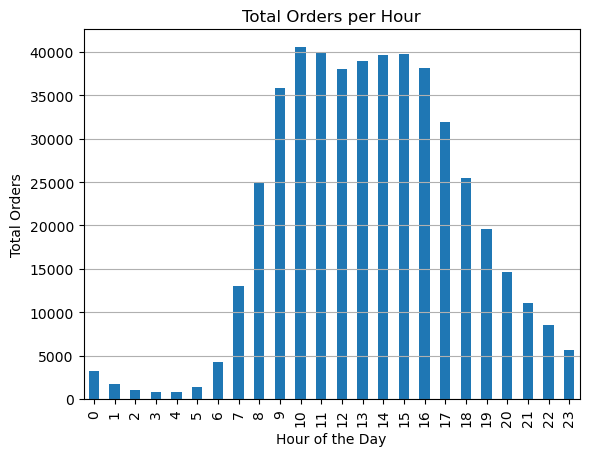

In [44]:
# Plotting the total hourly orders
hourly_orders.plot(kind='bar',
                    x='order_hour_of_day',
                    y='order_id',
                    title='Total Orders per Hour',
                    xlabel='Hour of the Day',
                    ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

In this graph it shows that orders tend to start trending up at 7am generally when customers start to wake up and start to trend downward around 4pm. In this dataset it shows that Instacart customers tend to order the most during the 9-5 work day.

[Back to Table of Contents](#back)

##### Part A-3: Create a plot that shows what day of the week people shop for groceries

In [45]:
# Counting and storing the total number of orders for each day of the week
dow_orders = instacart_orders.groupby('order_dow')['order_id'].count()

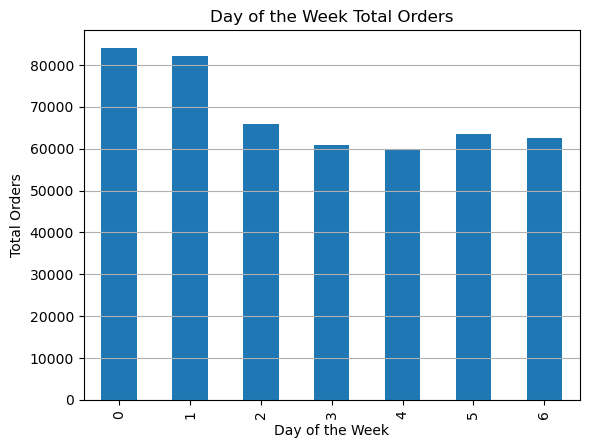

In [46]:
# Plotting the total number of orders for each day of the week
dow_orders.plot(kind='bar',
                x='order_dow',
                y='order_id',
                title='Day of the Week Total Orders',
                xlabel='Day of the Week',
                ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

On the day of the week axis it it would be safe to assum that 0 is correlated to Saturday. Saturdays are usually the busiest days more most businesses since customers have time off to run their errands like grocery shopping and this is also supported as 4 would be correlated to Wednesday as Wednesday is usuall the slowest day of the week for most businesses.

In this graphic it shows that the first two days of the week (Saturday and Sunday) are the most busy and that Instacart should allocate more resources into those days as those are the time customers are more likely to stop by and that day 4 (Wednesday) is the slowest day of the week

[Back to Table of Contents](#back)

##### Part A-4: Create a plot that shows how long people wait until placing their next order

In [47]:
# Calculating the mean, median, min, and max values
print(instacart_orders['days_since_prior_order'].mean())
print(instacart_orders['days_since_prior_order'].median())
print(instacart_orders['days_since_prior_order'].min())
print(instacart_orders['days_since_prior_order'].max())

11.101813900274362
7.0
0.0
30.0


From the mean, median, min, and max methods it shows that the median customer will wait about a week before they reorder. Also, I should note that since the average is significantly higher than the median it shows that there are some large outliers when it comes to small part of the customers.

In [48]:
# Finding the most common reorder timespan
days_unitl_reorder = instacart_orders['days_since_prior_order'].value_counts()
days_unitl_reorder.head(10)

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
Name: days_since_prior_order, dtype: int64

In this dataset it shows that most popular time frames that customers order is at least once a week or exactly once a month. 

This makes sense as when we compared the mean to the median that about half order at least once a week and that there is a large outlier of customers that take a lot longer to order skewing the average up from the median value.

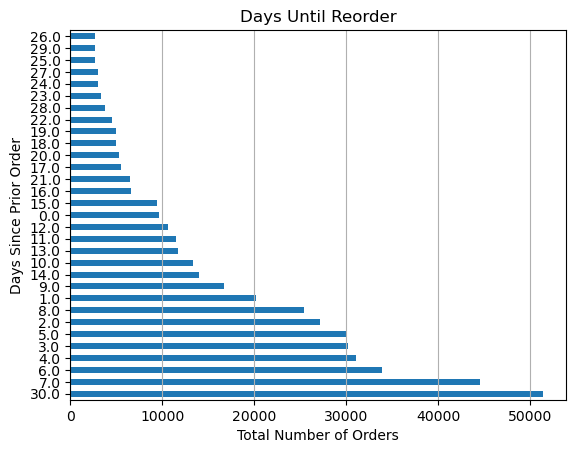

In [49]:
# Plotting reorder time
days_unitl_reorder.plot(kind='barh',
                         title='Days Until Reorder',
                         xlabel='Total Number of Orders',
                         ylabel='Days Since Prior Order')
plt.grid(axis='x')
plt.show()

In this graphic it shows that a heavy majority of customers either reorder on Instacart within 7 days or they order exactly once a month

[Back to Table of Contents](#back)

### Part: B

##### Part B-1: Finding the difference in hourly order sales volume between Wednesdays and Saturdays

In [50]:
# Filtering for Wednesday orders and counting the total number of orders per hour
wednesday = instacart_orders[instacart_orders['order_dow'] == 4].groupby('order_hour_of_day')['order_id'].count()

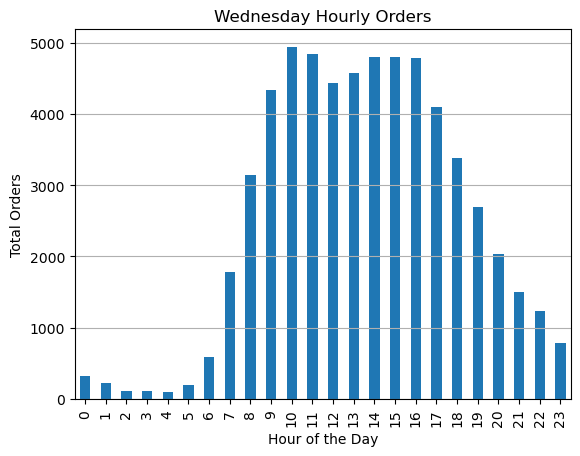

In [51]:
# Plotting hourly Wednesday orders
wednesday.plot(kind='bar',
               x='order_hour_of_day',
               y='order_id',
               title='Wednesday Hourly Orders',
               xlabel='Hour of the Day',
               ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

The distribution in orders on Wednesday looks very similar to the average overall with two peaks during the busiest hours

In [52]:
# Filtering for Saturday orders and counting the total number of orders per hour
saturday = instacart_orders[instacart_orders['order_dow'] == 0].groupby('order_hour_of_day')['order_id'].count()

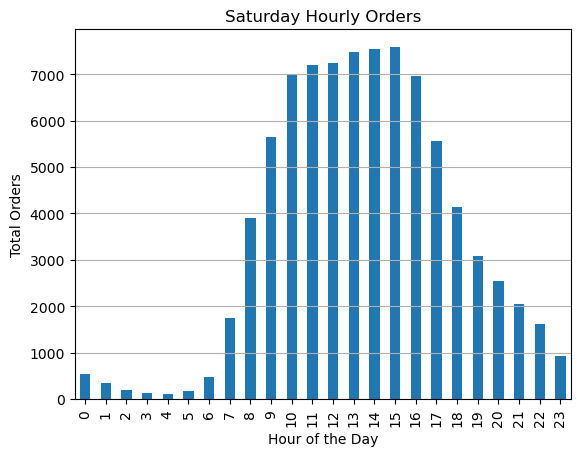

In [53]:
# Plotting hourly Saturday orders
saturday.plot(kind='bar',
              x='order_hour_of_day',
              y='order_id',
              title='Saturday Hourly Orders',
              xlabel='Hour of the Day',
              ylabel='Total Orders')
plt.grid(axis='y')
plt.show()

Unlike the graph for Wednesday, the Saturday graph has one peak in orders instead of two peaks in the Wednesday graph.
Also the volume of orders is noticeably higher throughout the day

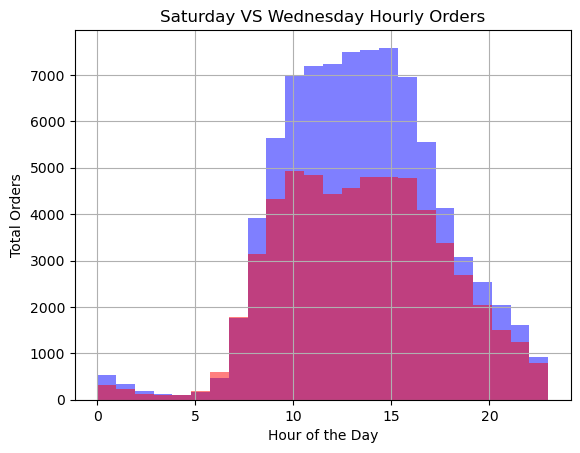

In [54]:
instacart_orders[instacart_orders['order_dow'] == 0]['order_hour_of_day'].hist(alpha=.5,
                                                                               bins=24,
                                                                               color='blue')

instacart_orders[instacart_orders['order_dow'] == 4]['order_hour_of_day'].hist(alpha=.5,
                                                                               bins=24,
                                                                               color='red')

plt.title('Saturday VS Wednesday Hourly Orders')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.show()

When we overlay the two graphs for Saturday and Wednesday it looks like Saturday clealy does more volume in orders compared to Wednesday. This difference can been seen especially towards the peak hours of the day.

[Back to Table of Contents](#back)

##### Part B-2: Customer order distribution plot

In [55]:
# Counting the frequency of orders from each user
customer_order_freq = instacart_orders.groupby('user_id')['order_number'].count()

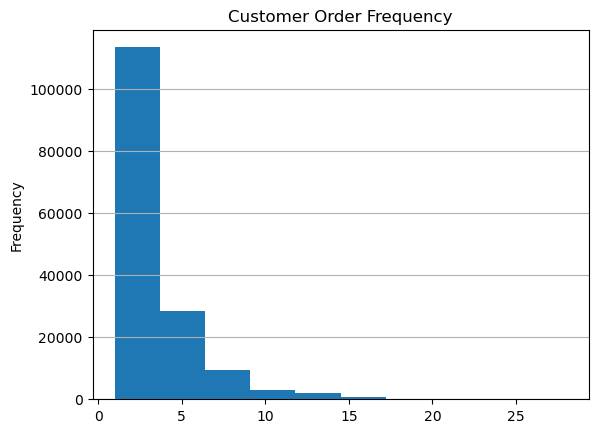

In [56]:
# Plotting the frequency of orders
customer_order_freq.plot(kind='hist',
                         title='Customer Order Frequency',
                         xlabel='Orders Placed',
                         ylabel='Order Frequency')
plt.grid(axis='y')
plt.show()

In this graphic it shows that most customers place less than 25 orders

[Back to Table of Contents](#back)

##### Part B-3: Top 20 Products

In [57]:
# Merging the dataframes so all the columns needed for analysis is in one dataframe
product_merged = order_products.merge(products, on='product_id')
product_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int32 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 260.1+ MB


In [58]:
# Counting the orders from the top 20 products
top_20_list = product_merged.groupby(['product_name','product_id'])['order_id'].count().sort_values(ascending=False).head(20)

To find the top 20 products I grouped the products by 'product_name' and 'product_id', counted each order in those groups, and sorted the values from highest to lowest. By getting the first 20 values will be the top 20 products since it is sorted from largest value to lowest value.

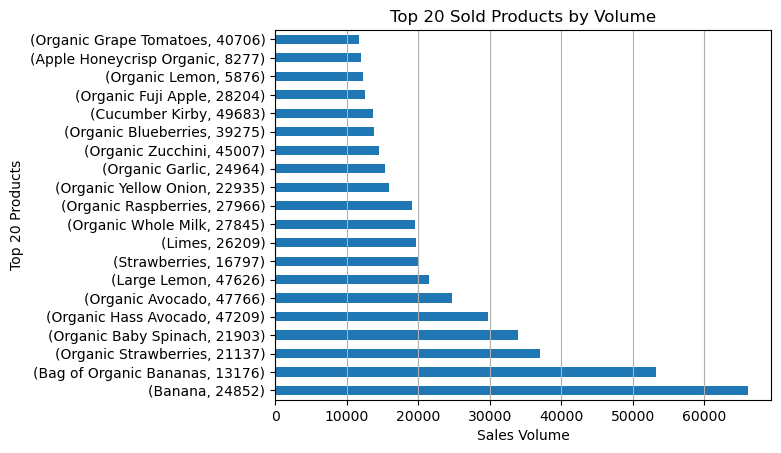

In [59]:
# Plotting the top 20 products
top_20_list.plot(kind='barh',
                 title='Top 20 Sold Products by Volume',
                 xlabel='Sales Volume',
                 ylabel='Top 20 Products')
plt.grid(axis='x')
plt.show()

Based on the top 20 products sold a majority of the volume sold seems to be fruits and vegetables

[Back to Table of Contents](#back)

### Part: C

##### Part C-1: Cart size per order

In [60]:
# Merging the dataframes so all the columns needed for analysis is in one dataframe
cart_size_merged = order_products.merge(instacart_orders, on='order_id')
cart_size_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int32  
 3   reordered               int64  
 4   user_id                 int64  
 5   order_number            int64  
 6   order_dow               int64  
 7   order_hour_of_day       int64  
 8   days_since_prior_order  float64
dtypes: float64(1), int32(1), int64(7)
memory usage: 329.4 MB


In [61]:
# Counting the total numbder of products in each order
customer_cart_size = cart_size_merged.groupby('order_id')['product_id'].count()
customer_cart_size.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Looking more into the customer_cart_size, it shows that the average cart size is about 10 items, and the median cart size is 8 items. Since the average is noticeably larger than the median it shows that there are some large outliers cart sizes increasing the average. Looking at the bell chart it shows that the max cart size is 127 orders.

In [62]:
# Now we can find the frequency of each cart size per order and graph the top 20 most popular cart sizes
customer_cart_size = customer_cart_size.value_counts().head(20)

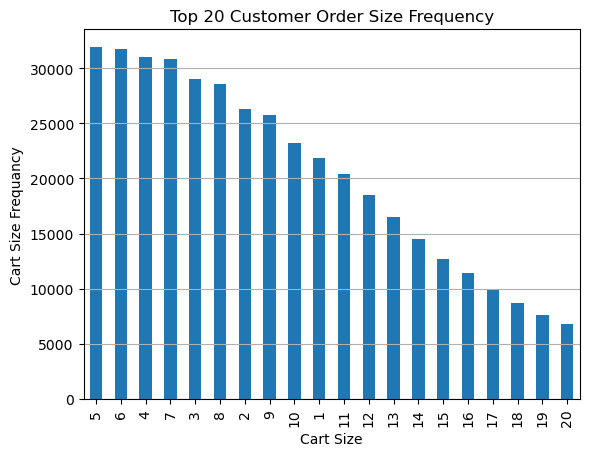

In [63]:
# Plotting the top 20 customer order sizes
customer_cart_size.plot(kind='bar',
                        title='Top 20 Customer Order Size Frequency',
                        xlabel='Cart Size',
                        ylabel='Cart Size Frequancy')
plt.grid(axis='y')
plt.show()

Based on the plot, it displays that the most popular cart sizes are 5, 6, 4, 7, and 3.

[Back to Table of Contents](#back)

##### Part C-2: What are the top 20 items that are reordered most frequently?

In [64]:
# Counting the total number of orders for each product and saving the top 20
top_20_reorders = product_merged.groupby(['product_name', 'product_id'])['reordered'].sum().sort_values(ascending=False).head(20)

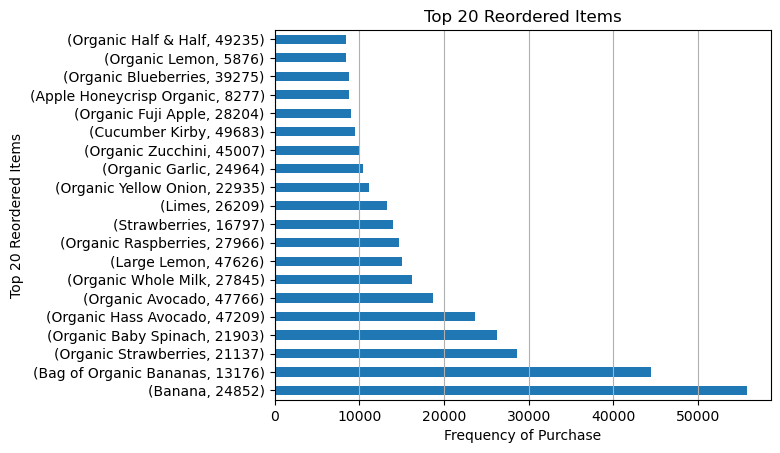

In [65]:
# Plotting the top 20 products
top_20_reorders.plot(kind='barh',
                     title='Top 20 Reordered Items',
                     xlabel='Frequency of Purchase',
                     ylabel='Top 20 Reordered Items')
plt.grid(axis='x')
plt.show()

Many of the items on this list are also items on the top 20 sold items as well showing that the top 20 sold items are also the most repurchased items

[Back to Table of Contents](#back)

### Conclusion

This analysis of Instacart's 2017 data shows that most customers are weekly shoppers or once a month shoppers. These customers often come to buy fruits and vegetables indicating that the produce Instacart sells are possibly of high quality and could possibly sold for a higher premium. Instacart customers also tend to order more on the weekends and show that there could be more room for improvement on the weekdays. Possibly, if there were more sales during the slower days like Wednesday it could attrack more customers and have them be more frequent customers.

[Back to Table of Contents](#back)